<a href="https://colab.research.google.com/github/Hamdallah-Abdulfatah/Bioinformatics_Portfolio/blob/main/Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy requests matplotlib seaborn


In [ ]:
import requests
import pandas as pd

# Define the API endpoint for TCGA-BRCA mutations
url = "https://www.cbioportal.org/api/molecular-profiles/brca_tcga_mutations/mutations?sampleListId=brca_tcga_all"

# Fetch the data
response = requests.get(url)

# Convert to DataFrame if successful
if response.status_code == 200:
    mutations = pd.DataFrame(response.json())
    print("Data Loaded Successfully!")
    print(mutations.head())  # Preview first 5 rows
else:
    print("Failed to fetch data:", response.status_code)


Data Loaded Successfully!
                      uniqueSampleKey                uniquePatientKey  \
0  VENHQS1BUi1BMUFSLTAxOmJyY2FfdGNnYQ  VENHQS1BUi1BMUFSOmJyY2FfdGNnYQ   
1  VENHQS1BUi1BMUFSLTAxOmJyY2FfdGNnYQ  VENHQS1BUi1BMUFSOmJyY2FfdGNnYQ   
2  VENHQS1BUi1BMUFSLTAxOmJyY2FfdGNnYQ  VENHQS1BUi1BMUFSOmJyY2FfdGNnYQ   
3  VENHQS1BUi1BMUFSLTAxOmJyY2FfdGNnYQ  VENHQS1BUi1BMUFSOmJyY2FfdGNnYQ   
4  VENHQS1BUi1BMUFSLTAxOmJyY2FfdGNnYQ  VENHQS1BUi1BMUFSOmJyY2FfdGNnYQ   

    molecularProfileId         sampleId     patientId  entrezGeneId  \
0  brca_tcga_mutations  TCGA-AR-A1AR-01  TCGA-AR-A1AR          7157   
1  brca_tcga_mutations  TCGA-AR-A1AR-01  TCGA-AR-A1AR          9256   
2  brca_tcga_mutations  TCGA-AR-A1AR-01  TCGA-AR-A1AR        154796   
3  brca_tcga_mutations  TCGA-AR-A1AR-01  TCGA-AR-A1AR         29994   
4  brca_tcga_mutations  TCGA-AR-A1AR-01  TCGA-AR-A1AR          2972   

     studyId            center mutationStatus validationStatus  ...  \
0  brca_tcga  genome.wustl.edu       

<ipython-input-9-14f45f23379b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutation_counts.index, y=mutation_counts.values, palette="Reds")


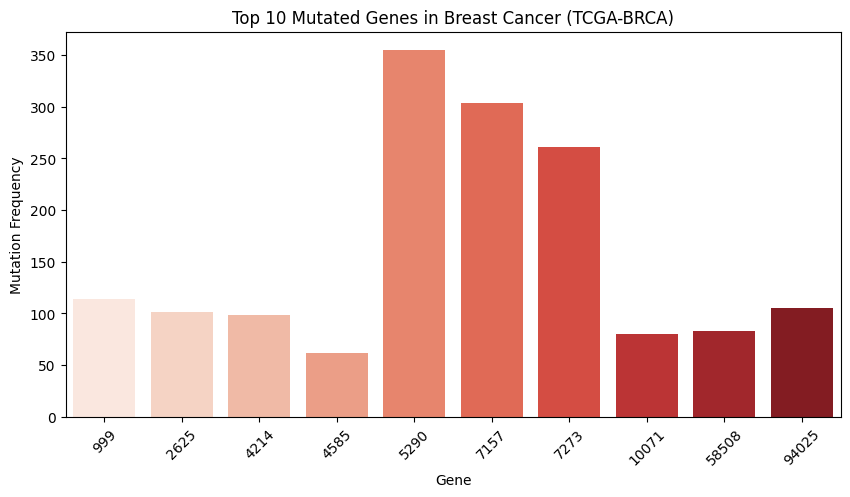

In [ ]:
# Count occurrences of each gene mutation
mutation_counts = mutations['entrezGeneId'].value_counts().head(10)

# Visualize top mutations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=mutation_counts.index, y=mutation_counts.values, palette="Reds")
plt.xlabel("Gene")
plt.ylabel("Mutation Frequency")
plt.title("Top 10 Mutated Genes in Breast Cancer (TCGA-BRCA)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(mutations.columns)

Index(['uniqueSampleKey', 'uniquePatientKey', 'molecularProfileId', 'sampleId',
       'patientId', 'entrezGeneId', 'studyId', 'center', 'mutationStatus',
       'validationStatus', 'tumorAltCount', 'tumorRefCount', 'startPosition',
       'endPosition', 'referenceAllele', 'proteinChange', 'mutationType',
       'ncbiBuild', 'variantType', 'keyword', 'chr', 'variantAllele',
       'refseqMrnaId', 'proteinPosStart', 'proteinPosEnd'],
      dtype='object')
